In [3]:
### imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

<h2 align="center" style="color:blue">Exploratory Data Analysis & Data Cleaning</h2>

In [32]:
df = pd.read_excel('premiums.xlsx')
print(df.shape)
df.head()

(50000, 13)


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [33]:
df.isna().sum()

Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

In [36]:
df.dropna(inplace=True)
df.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
dtype: int64

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [39]:
print(df.describe())
continious_features = df.select_dtypes('int64','float64').columns
continious_features

                age  number_of_dependants  income_lakhs  annual_premium_amount
count  49976.000000          49976.000000  49976.000000           49976.000000
mean      34.591764              1.711842     23.021150           15766.810189
std       15.000378              1.498195     24.221794            8419.995271
min       18.000000             -3.000000      1.000000            3501.000000
25%       22.000000              0.000000      7.000000            8607.750000
50%       31.000000              2.000000     17.000000           13928.000000
75%       45.000000              3.000000     31.000000           22273.500000
max      356.000000              5.000000    930.000000           43471.000000


Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

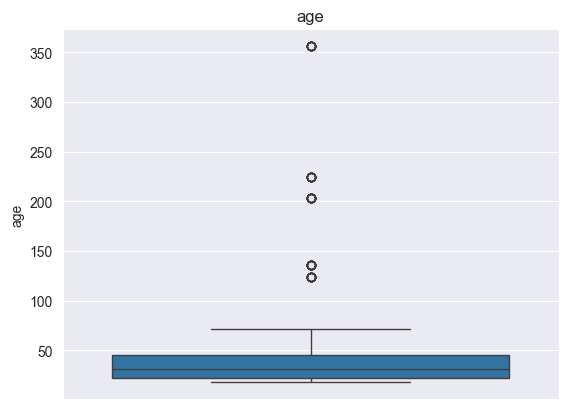

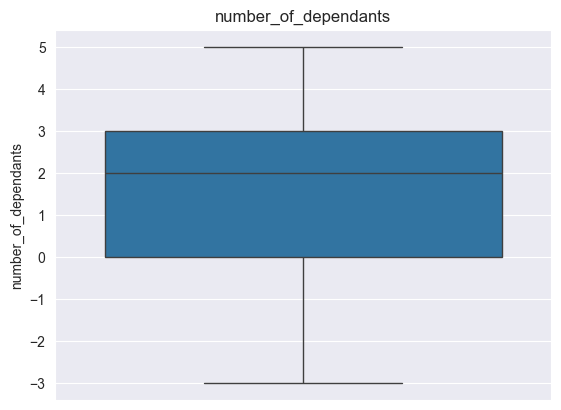

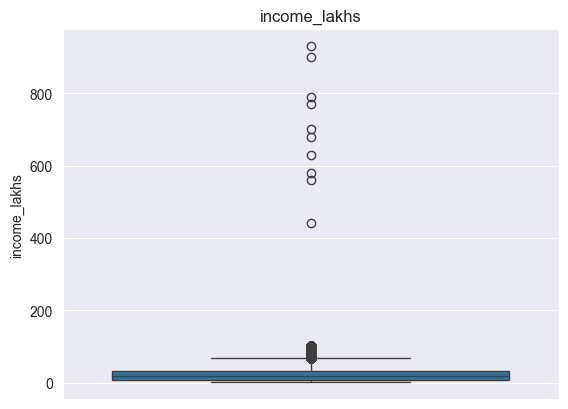

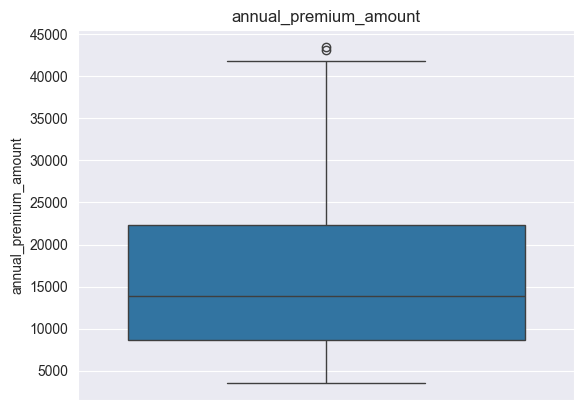

In [40]:
for col in continious_features:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [41]:
df.age.describe()

count    49976.000000
mean        34.591764
std         15.000378
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max        356.000000
Name: age, dtype: float64

In [42]:
df1 = df[df.age < 100].copy() 
df1['number_of_dependants'] = abs(df1['number_of_dependants'])

In [43]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


In [44]:
q999 = df1.income_lakhs.quantile(0.999)
df2 = df1[df1['income_lakhs'] <= 100]

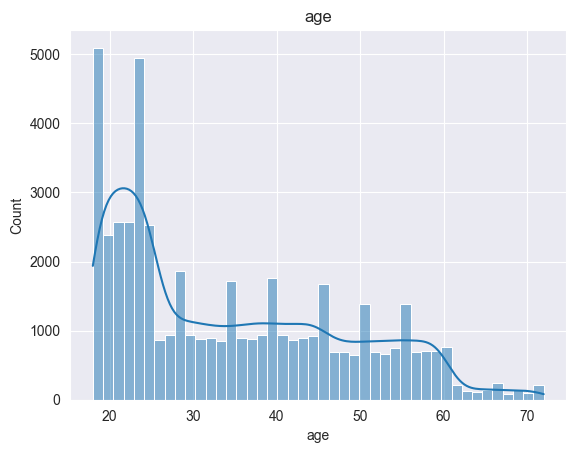

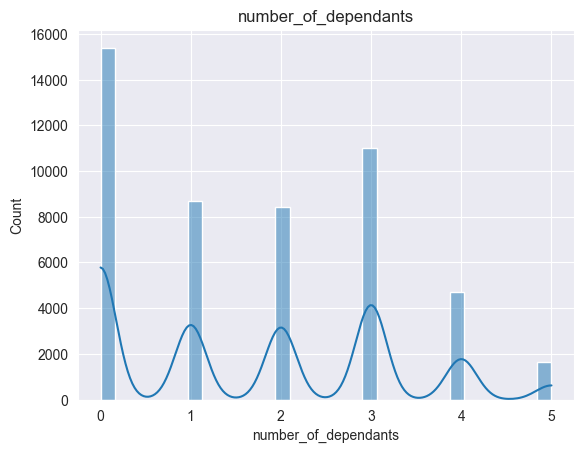

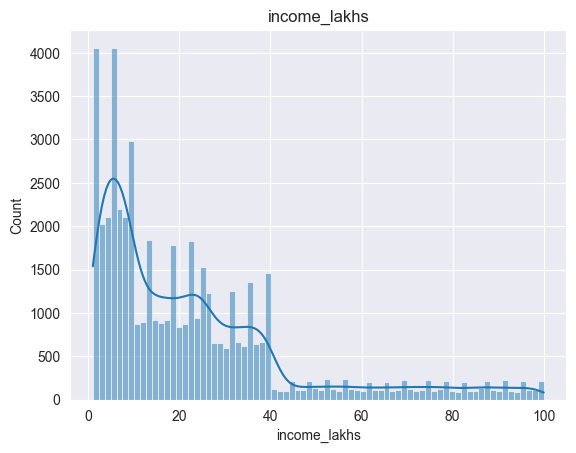

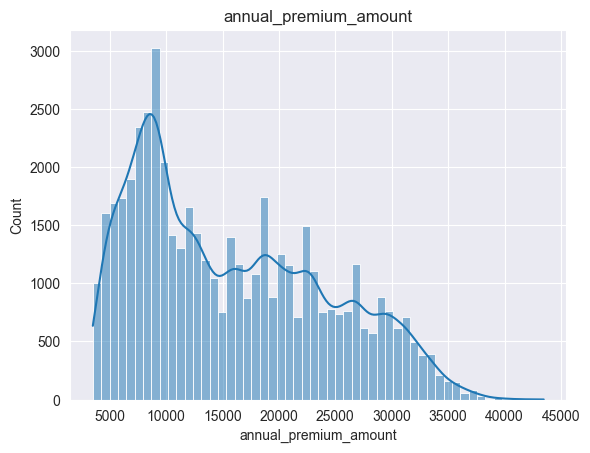

In [45]:
df2.describe()
for col in df2[continious_features]:
    sns.histplot(df2[col], kde =True)
    plt.title(col)
    plt.show()

In [46]:
categorical_features = df2.select_dtypes('object').columns
categorical_features

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [47]:
for col in categorical_features:
    print(col)
    print(df[col].unique())

gender
['Male' 'Female']
region
['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status
['Unmarried' 'Married']
bmi_category
['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status
['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status
['Salaried' 'Self-Employed' 'Freelancer']
income_level
['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history
['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan
['Bronze' 'Silver' 'Gold']


In [48]:
df2.loc[:, 'smoking_status'] = df2.smoking_status.replace({'Not Smoking': 'No Smoking', 'Does Not Smoke': 'No Smoking', 'Smoking=0': 'No Smoking'})

In [49]:
df2.smoking_status.value_counts()

smoking_status
No Smoking    27343
Regular       15664
Occasional     6901
Name: count, dtype: int64

<h2 align="center" style="color:blue">Feature Engineering</h2>

In [50]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure": 6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.loc[:, 'disease1'].fillna('none', inplace=True)
df2.loc[:, 'disease2'].fillna('none', inplace=True)
df2.loc[:, 'total_risk_score'] = 0

# Calculate the total risk score for each condition
for disease in ['disease1', 'disease2']:
    df2.loc[:, 'total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2.loc[:, 'normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)

df2.head(2)


C:\Users\LilD\AppData\Local\Temp\ipykernel_18336\4020028509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
C:\Users\LilD\AppData\Local\Temp\ipykernel_18336\4020028509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
C:\Users\LilD\AppData\Local\Temp\ipykernel_18336\40200

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571


In [51]:
df2['insurance_plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [52]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Gold': 3, 'Silver':2})
df2.head()

C:\Users\LilD\AppData\Local\Temp\ipykernel_18336\604831246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Gold': 3, 'Silver':2})


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571


In [53]:
df2['income_level'].value_counts()

income_level
<10L         18643
10L - 25L    14369
25L - 40L    10273
> 40L         6623
Name: count, dtype: int64

In [54]:
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L':2, '25L - 40L':3, '> 40L':4})

C:\Users\LilD\AppData\Local\Temp\ipykernel_18336\4151598417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L':2, '25L - 40L':3, '> 40L':4})


In [55]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571


In [56]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,False,False,True,False,False,False,False,False,True,False
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,True,False,False,True,False,False,False,True,True,False
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,False,False,False,False,False,False,False,False,False,True
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,True,False,False,False,False,False,False,False,True,False
4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,False,False,True,False,True,False,False,True,False,True


In [57]:
df3.drop(['medical_history','disease1','disease2','total_risk_score'], axis=1, inplace=True)

<Axes: >

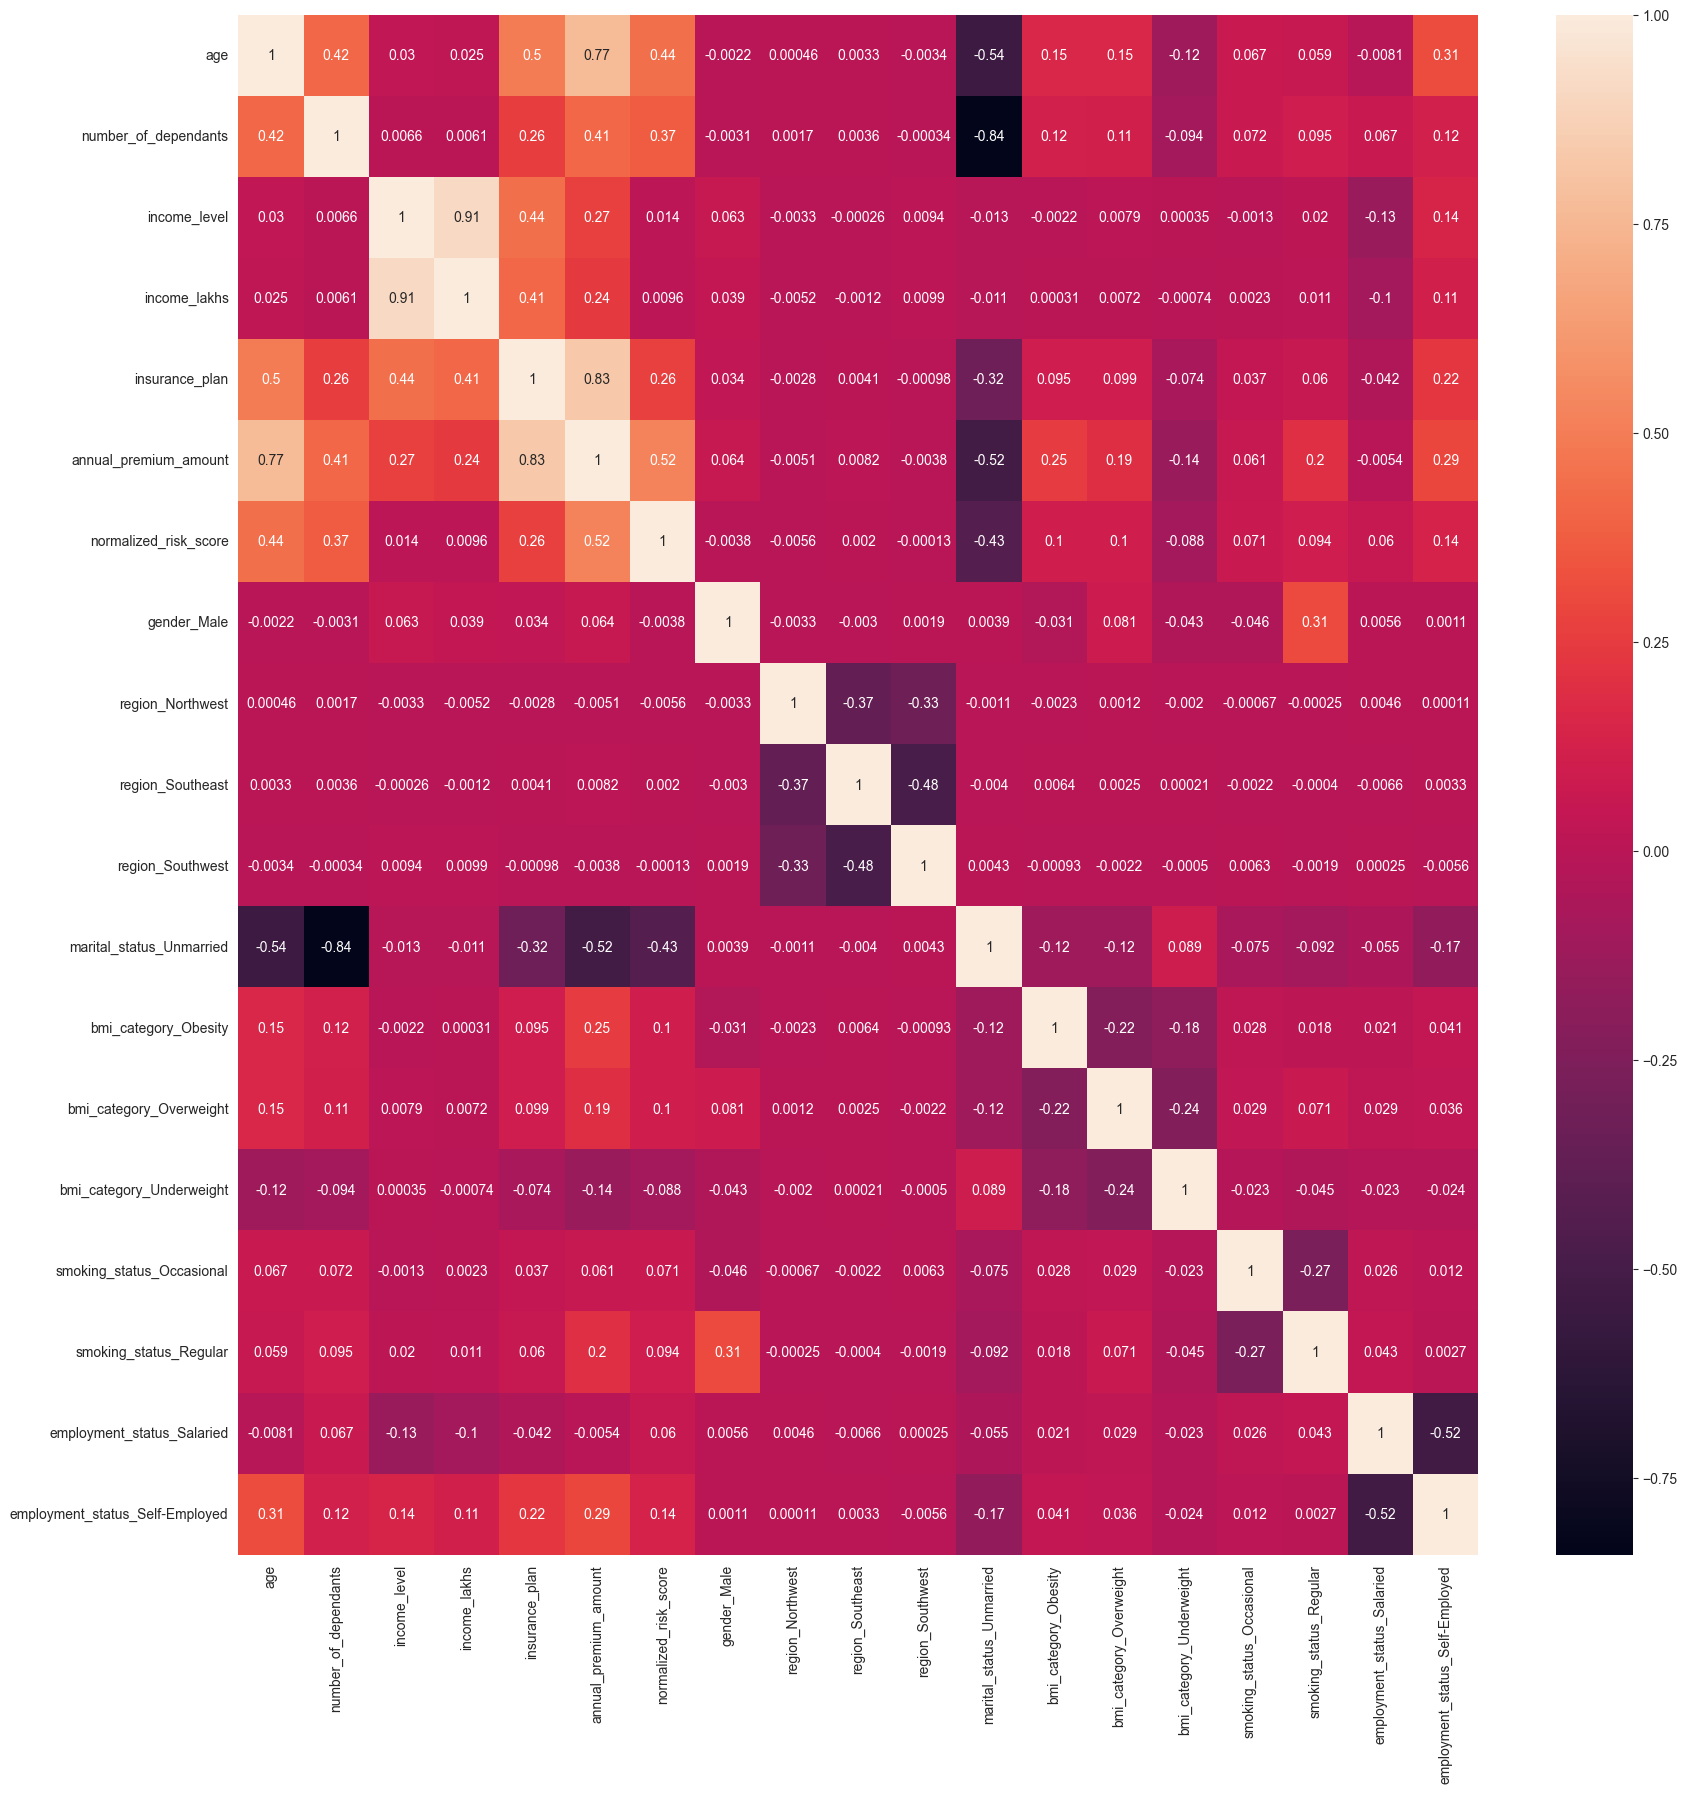

In [58]:
df3.head()

cm = df3.corr()

plt.figure(figsize = (20,20))
sns.heatmap(cm, annot=True)

In [59]:
X = df3.drop('annual_premium_amount', axis = 1)
y = df3['annual_premium_amount']

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']

X[col_to_scale] = scaler.fit_transform(X[col_to_scale])

In [61]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.000000,0.050505,0.0,0.428571,True,True,False,False,True,False,False,False,False,False,True,False
1,0.203704,0.4,0.000000,0.050505,0.0,0.428571,False,False,True,False,False,True,False,False,False,True,True,False
2,0.574074,0.4,0.333333,0.191919,0.5,0.428571,False,False,False,False,False,False,False,False,False,False,False,True
3,0.222222,0.6,1.000000,0.767677,1.0,0.000000,False,False,True,False,False,False,False,False,False,False,True,False
4,0.000000,0.0,1.000000,0.989899,0.5,0.428571,True,False,False,False,True,False,True,False,False,True,False,True


In [64]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    numeric_data = data.select_dtypes(include=[np.number]).dropna()

    vif_df = pd.DataFrame()
    vif_df['Column'] = numeric_data.columns
    vif_df['VIF'] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
    
    return vif_df

import numpy as np  

X_numeric = X.select_dtypes(include=[np.number]) 
X_numeric = X_numeric.dropna()  

vif = calculate_vif(X_numeric)
print(vif)


                  Column        VIF
0                    age   3.863596
1   number_of_dependants   2.703404
2           income_level  11.916480
3           income_lakhs  11.106130
4         insurance_plan   3.564270
5  normalized_risk_score   2.575413


In [65]:
X.drop('income_level', axis = 1)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,True,True,False,False,True,False,False,False,False,False,True,False
1,0.203704,0.4,0.050505,0.0,0.428571,False,False,True,False,False,True,False,False,False,True,True,False
2,0.574074,0.4,0.191919,0.5,0.428571,False,False,False,False,False,False,False,False,False,False,False,True
3,0.222222,0.6,0.767677,1.0,0.000000,False,False,True,False,False,False,False,False,False,False,True,False
4,0.000000,0.0,0.989899,0.5,0.428571,True,False,False,False,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.111111,0.0,0.343434,0.0,0.000000,False,True,False,False,True,False,False,True,False,False,False,True
49996,0.537037,0.4,0.818182,1.0,0.357143,False,False,True,False,False,False,False,False,False,False,True,False
49997,0.055556,0.0,0.313131,0.0,0.000000,True,True,False,False,True,False,False,False,False,True,False,False
49998,0.000000,0.4,0.191919,0.0,0.000000,True,True,False,False,True,False,False,False,False,False,True,False


<h2 align="center" style="color:blue">Model Training</h2>

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=17)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.9255243854437746

In [67]:
feature_importance = model_lr.coef_

In [68]:
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

In [69]:
coef_df

,Coefficients
age,11216.518331
number_of_dependants,-551.253145
income_level,884.671064
income_lakhs,-1585.185924
insurance_plan,12466.550804
normalized_risk_score,4885.782931
gender_Male,116.632563
region_Northwest,-57.143447
region_Southeast,41.882624
region_Southwest,-9.995762


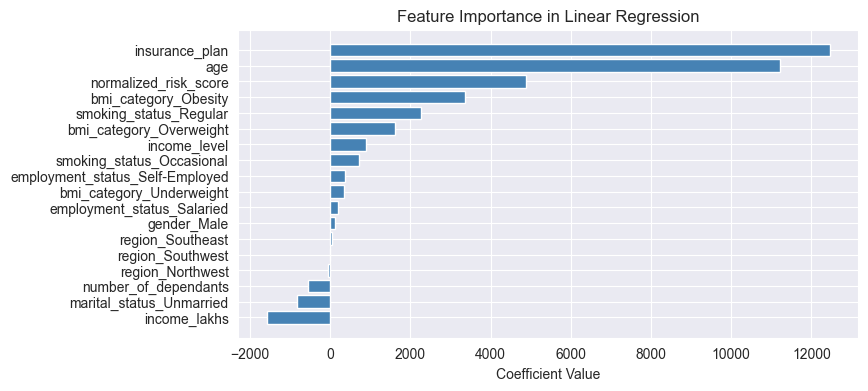

In [70]:


# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [71]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9774054884910583

In [72]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=17, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_
best_model = random_search.best_estimator_

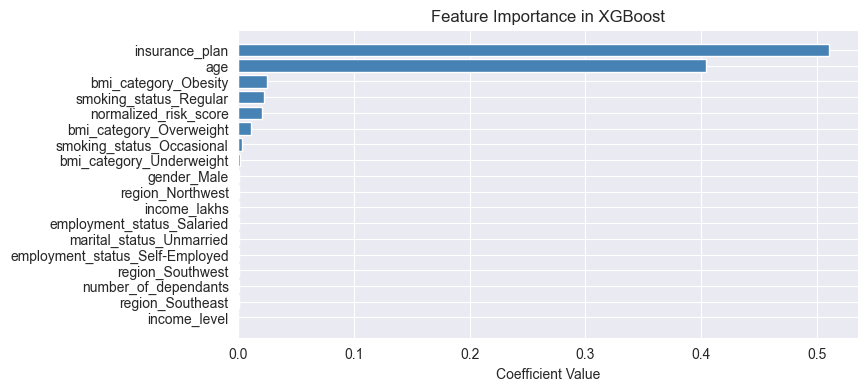

In [73]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [74]:
y_pred = best_model.predict(X_test)
residuals = y_pred - y_test
residuals_pct = (residuals/y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 'predicted': y_pred, 'residuals': residuals, 'residuals_pct': residuals_pct
})

results_df.head()

,actual,predicted,residuals,residuals_pct
8088,14777,12664.221680,-2112.778320,-14.297749
35532,22317,22073.796875,-243.203125,-1.089766
6734,16441,16056.689453,-384.310547,-2.337513
41681,22616,22409.925781,-206.074219,-0.911188
9196,18015,18652.128906,637.128906,3.536658


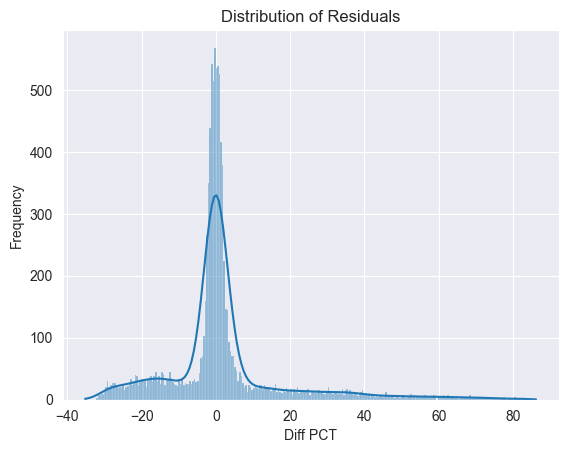

In [75]:
sns.histplot(results_df['residuals_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [76]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements

extreme_results_df = results_df[np.abs(results_df['residuals_pct'])>10]
extreme_results_df.head()

,actual,predicted,residuals,residuals_pct
8088,14777,12664.221680,-2112.778320,-14.297749
12408,11635,10160.598633,-1474.401367,-12.672122
19346,9149,6481.690430,-2667.309570,-29.154111
31310,12102,14862.992188,2760.992188,22.814346
22899,8992,6624.140625,-2367.859375,-26.332956


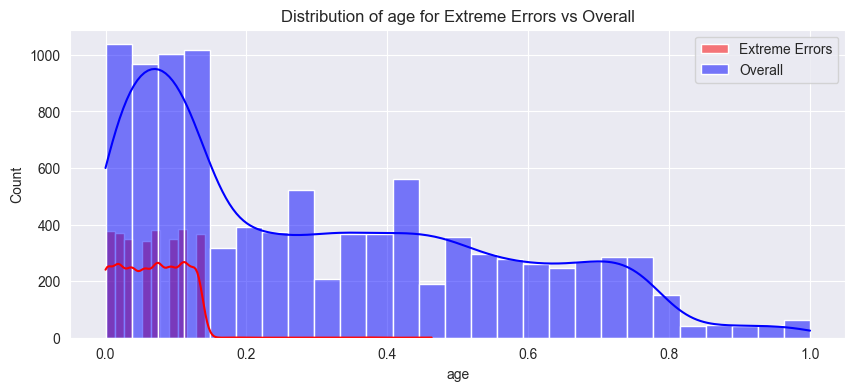

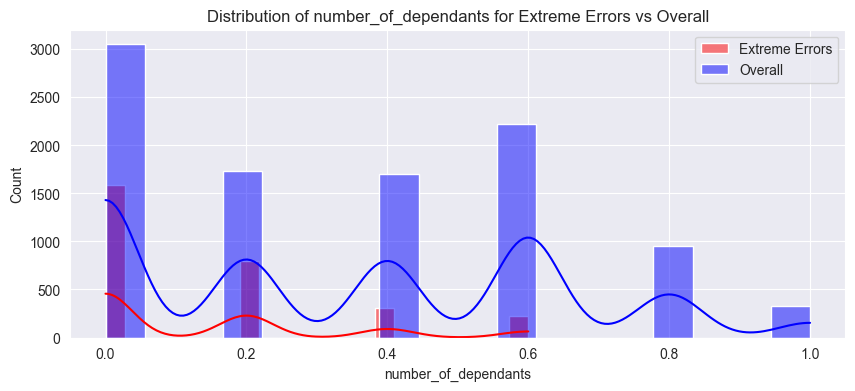

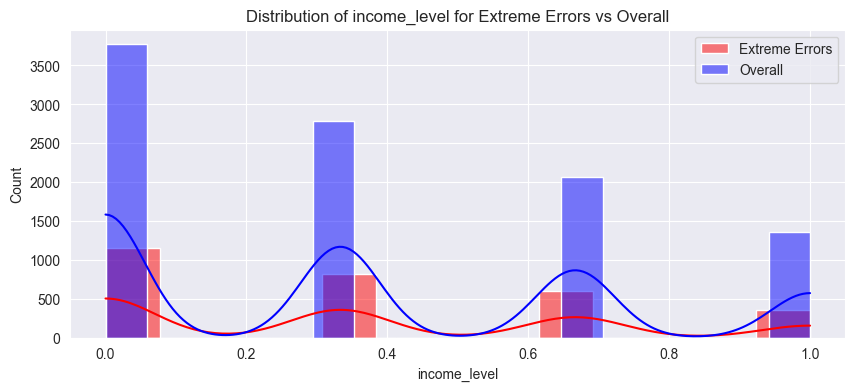

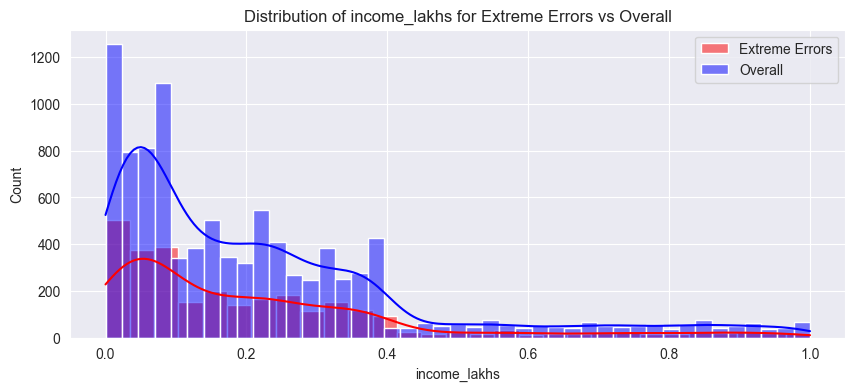

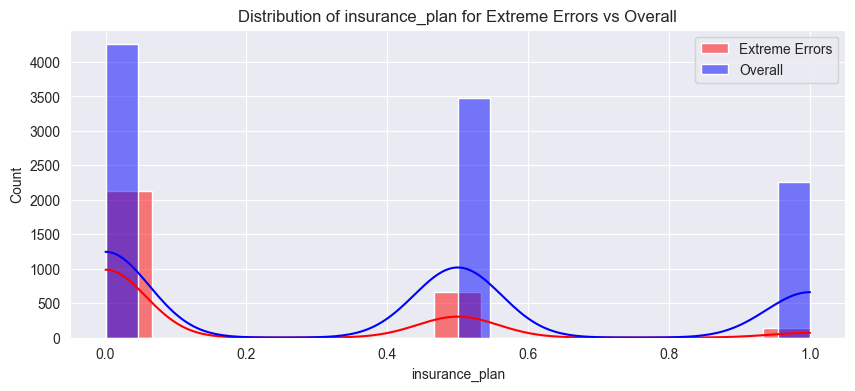

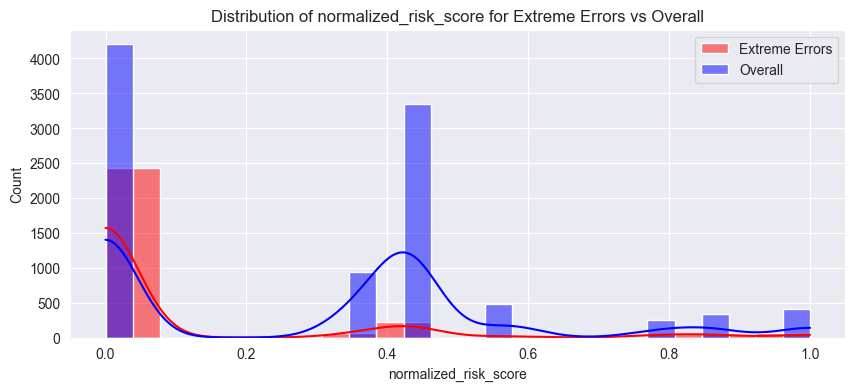

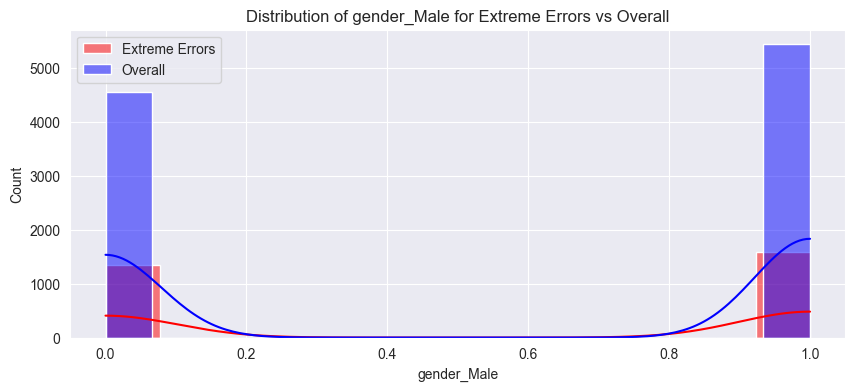

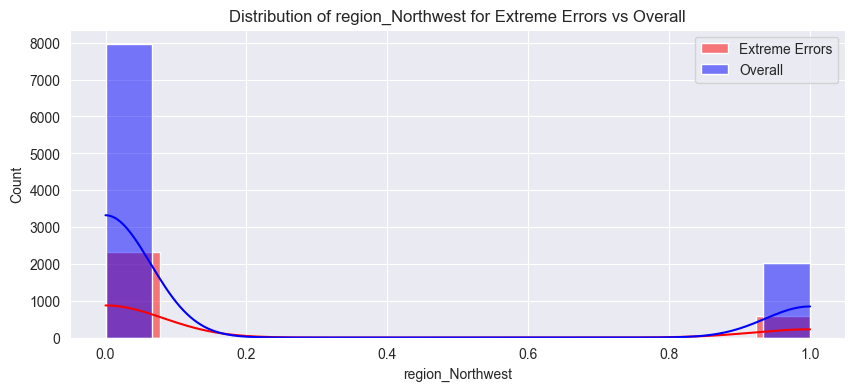

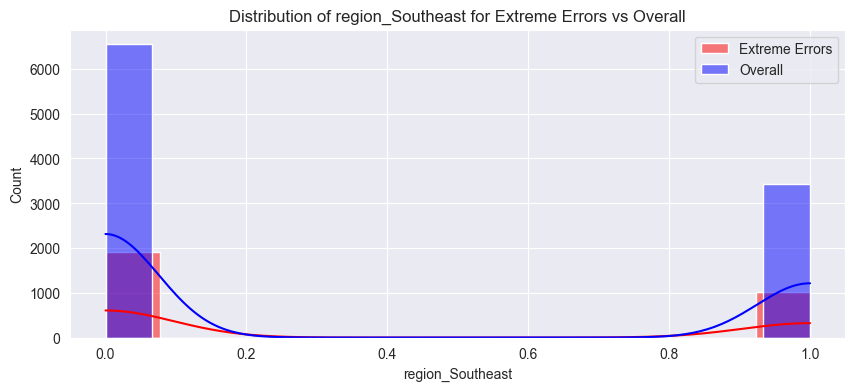

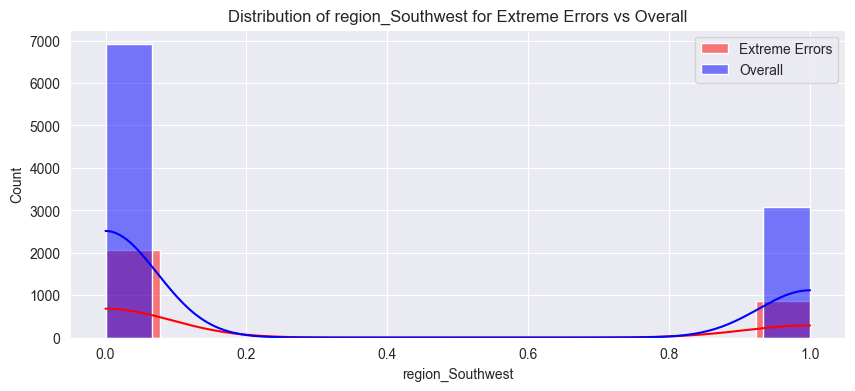

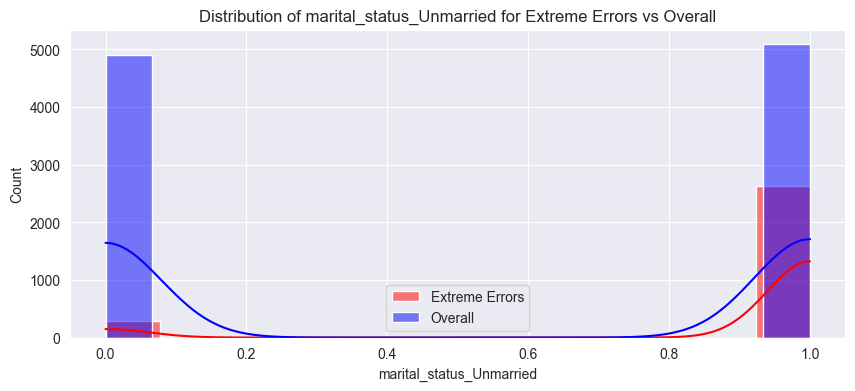

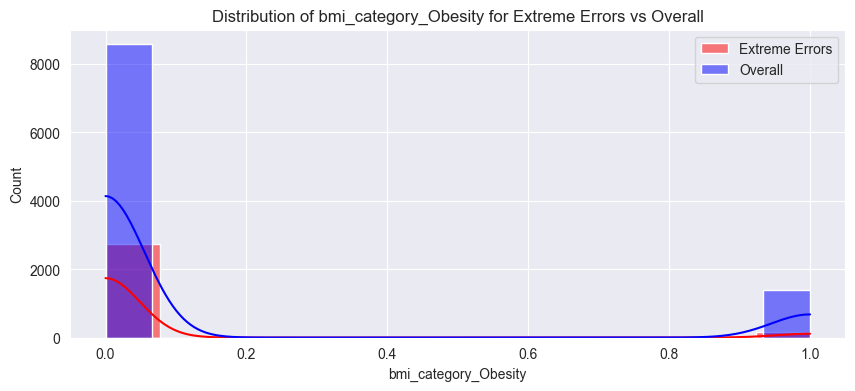

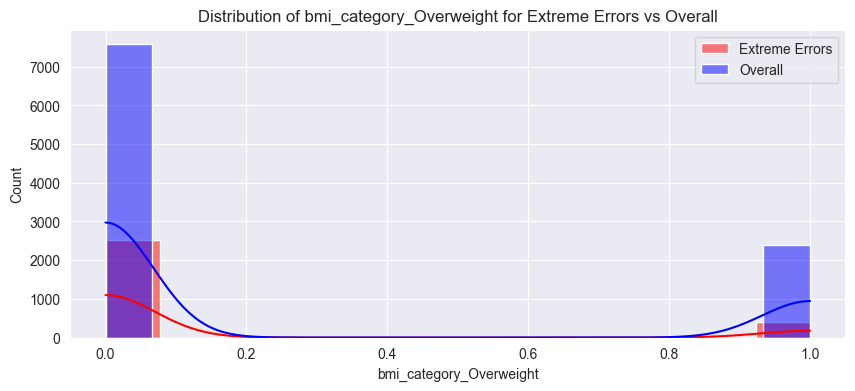

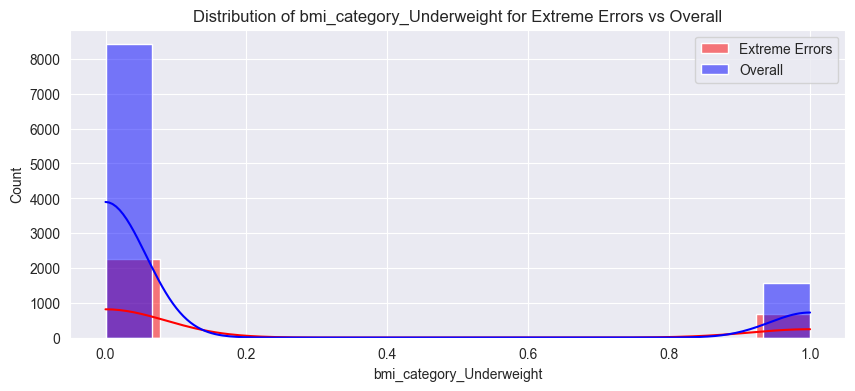

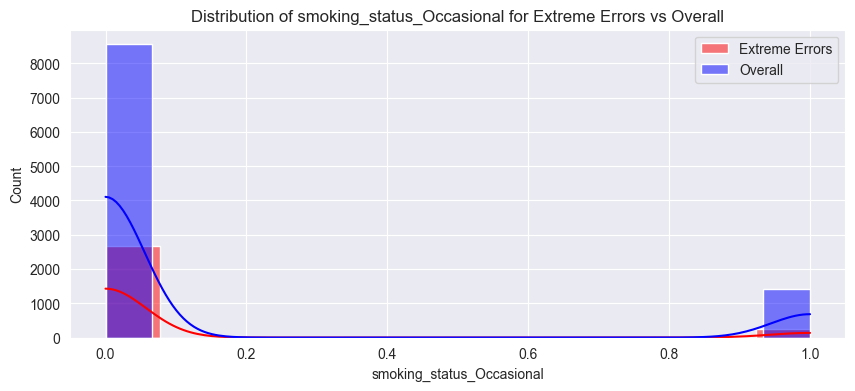

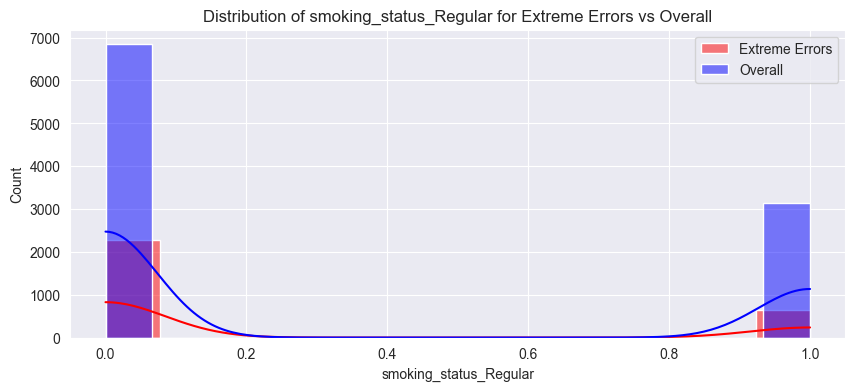

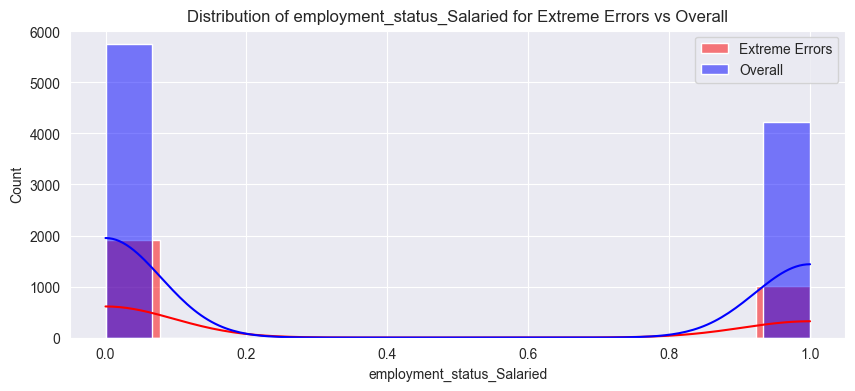

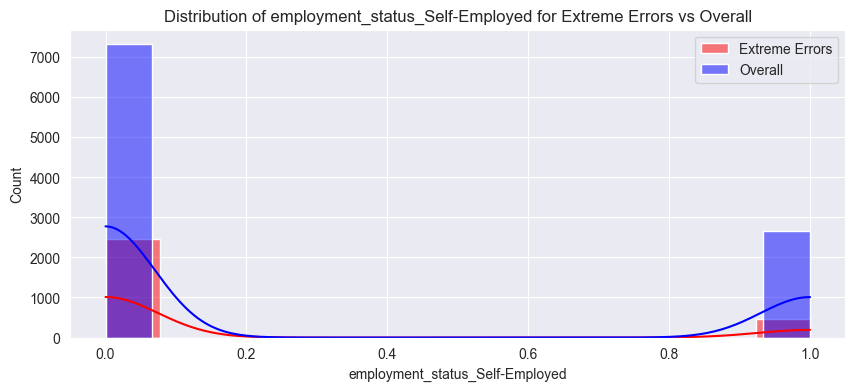

In [77]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)


for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [78]:
extreme_errors_df['income_level']=-1
cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,20.0,0.0,-2.0,21.0,2.0
1,23.0,0.0,-2.0,64.0,2.0
2,22.0,0.0,-2.0,25.0,1.0
3,25.0,0.0,-2.0,5.0,3.0
4,21.0,0.0,-2.0,7.0,1.0
